# 실습 과제2: 벡터화 연산과 브로드캐스팅 이해하기


## 문제 1: 기본 벡터화와 브로드캐스팅 이해하기

x = np.linspace(0, 5, 50)와 y = np.linspace(0, 5, 50)[:, np.newaxis]를 생성하세요. 여기서 x는 (50,)의 1차원 배열이고, y는 [:, np.newaxis]를 사용하여 (50, 1)의 2차원 배열로 변환됩니다.

x와 y의 형태를 출력하여 브로드캐스팅이 어떻게 이루어지는지 확인하세요.


In [6]:
import numpy as np
x = np.linspace(0,5,50)
y = np.linspace(0,5,50)
new_y = y[:,np.newaxis]
x.shape, y.shape, new_y.shape

((50,), (50,), (50, 1))

In [ ]:
# 브로드캐스팅 1단계 : 차원 수 맞추기
# x = (50,) 1차원 -> (1,50) 2차원으로 변환
# new_y = (50,1) 원래 2차원

# 브로드캐스팅 2단계 : 차원별 크기 비교 및 확장
# 두 배열의 모양을 오른쪽 끝에서부터 비교하면서 브로드캐스팅을 수행
# 맨 오른쪽 차원 


In [8]:
(x+new_y).shape

(50, 50)

문제 2: 브로드캐스팅을 활용하여 수식 계산하기
z = np.sin(x) ** 200 + np.cos(300 + y * x) * np.cos(x)를 사용하여 z 배열을 계산하세요.

z 배열의 형태를 출력하고, 브로드캐스팅에 의해 z의 형태가 (50, 50)이 되었는지 확인하세요.



In [21]:
# p.79

x = np.linspace(0,5,50)
y = np.linspace(0,5,50)
x.shape, y.shape

((50,), (50,))

In [22]:
y = y[:,None]
y.shape

(50, 1)

In [ ]:
x[None,:].shape #하지 말고 이해해보기

(1, 50)

In [24]:
(np.sin(x)**200).shape

(50,)

In [ ]:
(np.cos(y * x)).shape #여기서 브로드캐스팅이 발생

(50, 50)

In [23]:
(np.sin(x) ** 200 + np.cos(300 + y * x) * np.cos(x)).shape

(50, 50)

문제 3: 벡터화 연산으로 계산 속도 비교하기
for 반복문을 사용해 z의 각 요소를 수동으로 계산하는 코드를 작성하고, 벡터화 연산으로 구한 z와 같은 결과가 나오는지 확인하세요.

timeit 모듈을 사용하여 반복문을 통한 계산과 벡터화 연산을 각각 수행하는 데 걸리는 시간을 측정하고, 두 연산 방식의 속도 차이를 비교하세요.




In [26]:
# p.91
import numpy as np
mean = [0,0] #평균
cov = [[1,2],
        [2,5]]
X = rand.mul

NameError: name 'rand' is not defined

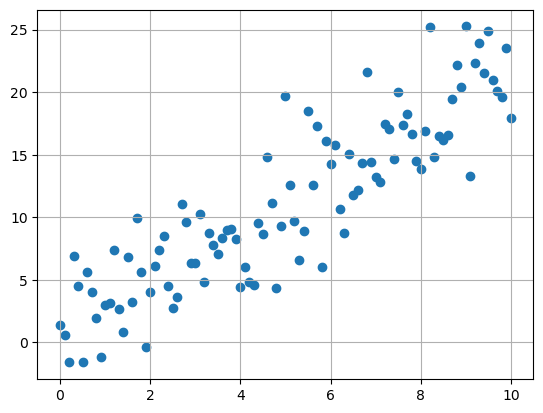

In [50]:
import matplotlib.pyplot as plt
def f(x, noise=0):
    return 2*x+1+noise

x = np.linspace(0,10,101)
noise = np.random.normal(0,3,len(x))
y = f(x, noise)
plt.scatter(x,y)
plt.grid()

In [75]:
idx = np.sort(np.random.choice(101,20, replace=False))
idx.shape, idx

((20,),
 array([ 4, 10, 11, 28, 33, 35, 46, 47, 52, 56, 60, 62, 66, 69, 77, 86, 87,
        89, 93, 96], dtype=int32))

In [76]:
s = x[idx]

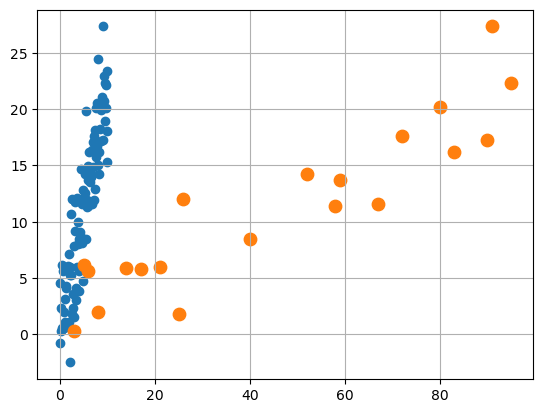

In [78]:
import matplotlib.pyplot as plt
def f(x, noise=0):
    return 2*x+1+noise

x = np.linspace(0,10,101)
noise = np.random.normal(0,3,len(x))
y = f(x, noise)
idx = np.sort(np.random.choice(101,20, replace=False))
s=y[idx]
plt.scatter(x,y)
plt.scatter(idx,s, s= 80)
plt.grid()

In [86]:
# p.93
x = np.arange(1,11)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [87]:
i = [2,1,8,4]
i

[2, 1, 8, 4]

In [88]:
x[i]

array([3, 2, 9, 5])

In [ ]:
x[i] = 99 # 인덱스 배열에 해당하는 항목에 특정값을 설정
x

array([ 1, 99, 99,  4, 99,  6,  7,  8, 99, 10])

In [89]:
x =np.zeros(10)
x

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [90]:
x[[0,0]]=[1]

In [91]:
x

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [92]:
x[[0,0]]=[1,2]

In [93]:
x

array([2., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [94]:
i = [2,1,8,4]
x[i]

array([0., 0., 0., 0.])

In [ ]:
x[i]+=[1] #x[i] = x[i]+1 연산
x

array([2., 1., 1., 0., 1., 0., 0., 0., 1., 0.])

In [96]:
x[i]+=[1] #x[i] = x[i]+1 연산
x

array([2., 2., 2., 0., 2., 0., 0., 0., 2., 0.])

In [97]:
x[i]+=[1] #x[i] = x[i]+1 연산
x

array([2., 3., 3., 0., 3., 0., 0., 0., 3., 0.])

In [ ]:
x[[6,6,6,6,6,6]]+=1 #인덱스 6번 여러개에 1을 더하기 시도 -> 한 인덱스에 여러번 더해지지는 않음
x

array([2., 3., 3., 0., 3., 0., 9., 0., 3., 0.])

In [ ]:
np.add.at(x,[6,6,6,6,6,6],1) # 인덱스 6번에 1을 여러번 더하려면 이렇게 사용 # 순차적 연산
x

array([ 2.,  3.,  3.,  0.,  3.,  0., 15.,  0.,  3.,  0.])

문제 4: 그래프를 사용해 시각적으로 결과 확인하기
z 값을 시각적으로 이해하기 위해 matplotlib 라이브러리를 사용하여 z의 값을 컬러 맵으로 시각화하세요.

plt.imshow(z, extent=(0, 5, 0, 5), origin='lower', cmap='viridis')와 plt.colorbar()를 사용해 결과를 시각화하고, 그래프의 형태를 확인하세요.

In [ ]:
import matplotlib.pyplot as plt
